
In this notebook, use our MESA engine to evolve your first star.


First, import camber and some utitilties including matplotlib, `mesa_reader` (a tool to read MESA files), and `smplotlib` (to style the plot).

In [ ]:
import camber
import smplotlib
import matplotlib.pyplot as plt
import mesa_reader as mr



In the included inlist file, we set `Zbase` to 0.02, which describes how rich it is in certain chemical elements. 
The initial mass is set at 1.0 solar masses (1x the mass of the sun). 

Start a MESA job using said inlist file.



In [ ]:
job = camber.mesa.create_job(command="./mk && ./rn")


Check the job status:


In [ ]:
job.status

'COMPLETED'


The model stops running after 14 billion simulated years, but you can create a partial plot as soon as `job.status` is `RUNNING`.
When the status is `COMPLETED`, run the following code one more time to make a full plot:



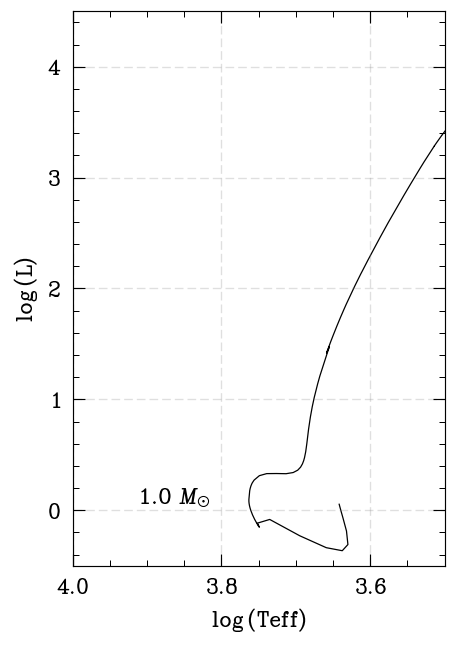

12.205041064997316


In [ ]:
fig = plt.figure(figsize=(4,6))

h=mr.MesaData('LOGS/history.data')
plt.plot(h.log_Teff,h.log_L,linewidth=0.75,zorder=1,label=str(round(h.star_mass[0],4))+' $M_{\odot}$',color='black')
plt.annotate(str(round(h.star_mass[0],4))+' $M_{\odot}$', (max(h.log_Teff)+0.15,h.log_L[0]),fontsize=16)

plt.xlim(4.0,3.5)
plt.ylim(-0.5,4.5)

plt.grid(alpha=0.25)
plt.xlabel('$\log$(Teff)')
plt.ylabel('$\log$(L)')
plt.show()

print(max(h.star_age)/1.0e9)